In [79]:
import pandas as pd
crime_2010to2020_df = pd.read_csv('estimated_crimes_1979_2020.csv', index_col=False)
pd.options.display.float_format = '{:,.0f}'.format
crime_2010to2020_df = crime_2010to2020_df[crime_2010to2020_df.year > 2009]
crime_2010to2020_df = crime_2010to2020_df[crime_2010to2020_df['state_name'].notna()]
crime_2010to2020_df['Rape'] = crime_2010to2020_df.rape_revised.combine_first(crime_2010to2020_df.rape_legacy)
crime_2010to2020_df = crime_2010to2020_df.drop(['state_abbr', 'caveats', 'rape_revised', 'rape_legacy'], axis=1)
crime_2010to2020_df.columns = crime_2010to2020_df.columns.str.replace('_', ' ')
crime_2010to2020_df.columns = map(str.title, crime_2010to2020_df.columns)
crime_2010to2020_df = crime_2010to2020_df.rename(columns={'State Name':'State'})
crime_2010to2020_df['All'] = crime_2010to2020_df[['Violent Crime', 'Homicide', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Rape']].sum(axis=1)
crime_2010to2020_df.to_csv('state_crime_cleaned.csv', sep='\t', encoding='utf-8') 

In [80]:
crime_2010to2020_df

,Year,State,Population,Violent Crime,Homicide,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape,All
1613,2010,Alaska,714146,4537,31,594,3379,20259,3105,15535,1619,533,"47,973"
1614,2010,Alabama,4785401,18363,275,4864,11869,168828,42484,115564,10780,"1,355","363,602"
1615,2010,Arkansas,2921588,14711,134,2369,10887,103820,32463,65796,5561,"1,321","231,501"
1616,2010,Arizona,6413158,26528,408,6953,16976,226802,50932,154137,21733,"2,191","484,927"
1617,2010,California,37338198,164133,1809,58116,95877,981939,228857,600558,152524,"8,331","2,139,620"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2020,Vermont,623347,1081,14,64,790,7586,961,6361,264,213,"17,070"
2179,2020,Washington,7693612,22596,301,5183,14435,210223,40167,142657,27399,"2,677","438,239"
2180,2020,Wisconsin,5832655,18861,308,3081,13452,86654,12744,64517,9393,"2,020","201,637"
2181,2020,West Virginia,1784787,6352,117,369,5034,24976,4877,17828,2271,832,"60,385"


In [81]:
crime_2021_df = pd.read_csv('2021_Quarter4_Crime.csv' , index_col=False)
crime_2021_df['Population1'] = crime_2021_df['Population1'].fillna(method='ffill')
crime_2021_df = crime_2021_df[crime_2021_df.Year > 2020]
crime_2021_df.columns = map(str.title, crime_2021_df.columns)
crime_2021_df.rename(columns={'Larceny-Theft':'Larceny', 'Population1':'Population', 'Murder':'Homicide'}, inplace=True)
crime_2021_df = crime_2021_df.drop(['City', 'Arson'], axis=1)
crime_2021_df['All'] = crime_2021_df[['Violent Crime', 'Homicide', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Rape']].sum(axis=1)
crime_2021_df.to_csv('state_crime_2021_cleaned.csv', sep='\t', encoding='utf-8') 

In [82]:
crime_2021_df

,State,Year,Population,Violent Crime,Homicide,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,All
1,Alabama,"2,021","243,900","5,275",87,442,410,"4,336","23,812","4,167","16,834","2,811","55,363"
3,Arizona,"2,021","264,071",528,7,79,84,358,"4,777",541,"3,848",388,"10,222"
5,Arizona,"2,021","259,629",319,3,67,36,213,"2,894",381,"2,335",178,"6,248"
7,Arizona,"2,021","527,361","2,015",24,274,322,"1,395","9,894","1,365","7,471","1,058","22,760"
9,Arizona,"2,021","178,486",495,8,74,60,353,"2,826",415,"2,141",270,"6,372"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Washington,"2,021","220,123","2,616",29,138,517,"1,932","14,819","2,192","8,946","3,681","31,189"
339,Wisconsin,"2,021","104,649",485,3,71,40,371,"1,610",248,"1,224",138,"4,052"
341,Wisconsin,"2,021","100,005",354,13,63,30,248,"1,094",143,793,158,"2,738"
343,Wisconsin,"2,021","262,736",756,11,95,130,520,"6,044",891,"4,494",659,"12,941"


In [83]:
cols_mul4 = ['Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All']
# crime_2021_df[cols_mul4] = crime_2021_df[cols_mul4] * 4
crime_2021_df
#["col3", "col4"].apply(lambda x : x.astype(int).sum())
crime_2021_df_grouped = crime_2021_df.groupby(["State"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())
crime_2021_df_grouped[cols_mul4] = crime_2021_df_grouped[cols_mul4] * 4
crime_2021_df_grouped['Year'] = "2021"
crime_2021_df_grouped

/var/folders/qs/1lf83t810fd_mwlrhrsvknvc0000gn/T/ipykernel_10592/716615617.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_2021_df_grouped = crime_2021_df.groupby(["State"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())


,State,Population,Violent Crime,Homicide,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,All,Year
0,Alabama,243900,21100,348,1768,1640,17344,95248,16668,67336,11244,221452,2021
1,Arizona,1637173,16312,192,2552,2496,11072,113136,14316,89004,9816,249080,2021
2,Arkansas,197688,16364,248,1008,1588,13520,42460,7880,30376,4204,113444,2021
3,California,2264248,33280,324,2616,6972,23368,157728,19852,101624,36252,345764,2021
4,Colorado,2764794,75960,1040,8888,13924,52108,459188,61400,280524,117264,953032,2021
5,Connecticut,382038,5456,140,472,2476,2368,27860,3288,18648,5924,60708,2021
6,Georgia,855974,25984,772,1192,4048,19972,105248,9700,78480,17068,245396,2021
7,Hawaii,966438,7152,12,780,2304,4056,90028,10820,63656,15552,178808,2021
8,Idaho,451837,4996,16,1448,316,3216,21760,2572,17432,1756,51756,2021
9,Illinois,292119,6224,36,484,556,5148,10452,1496,7684,1272,32080,2021


In [100]:
combined = pd.concat([crime_2010to2020_df, crime_2021_df_grouped], axis=0)
combined.to_csv('combined_crime.csv', sep='\t', encoding='utf-8') 
combined_old = combined
combined = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())

combined = combined

/var/folders/qs/1lf83t810fd_mwlrhrsvknvc0000gn/T/ipykernel_10592/1320192697.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, '2021']


Text(0, 0.5, 'No. of Crimes')

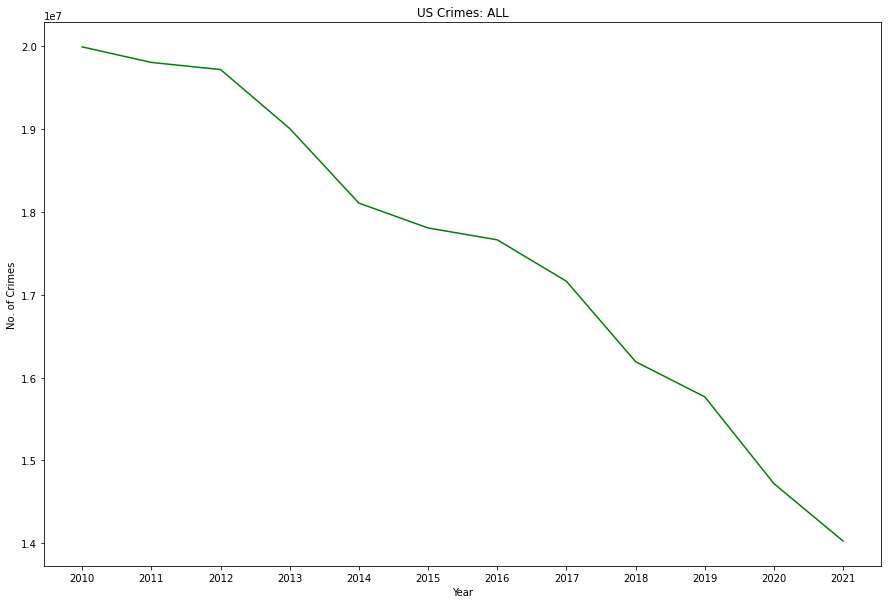

In [101]:
import matplotlib.pyplot as plt
years = combined['Year'].tolist()
print(years)
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(years, combined['All'].tolist(), color='green', label='All')
plt.title('US Crimes: ALL')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')

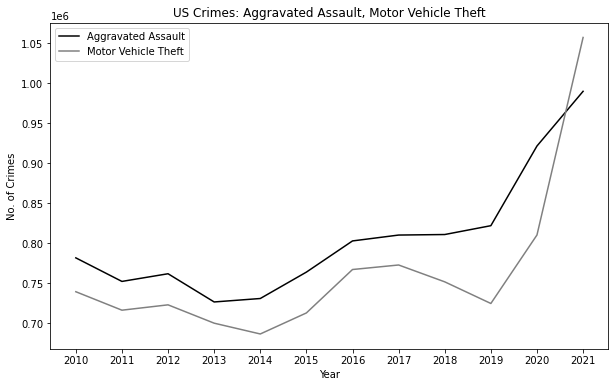

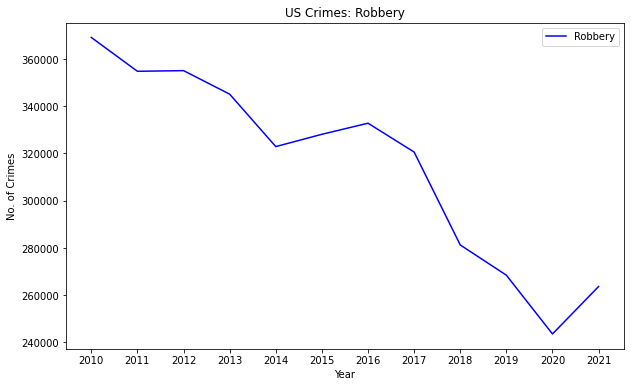

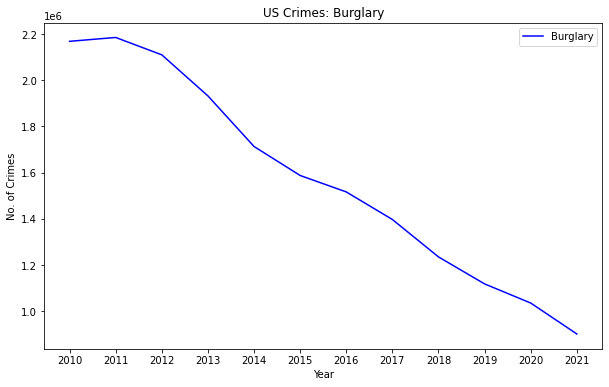

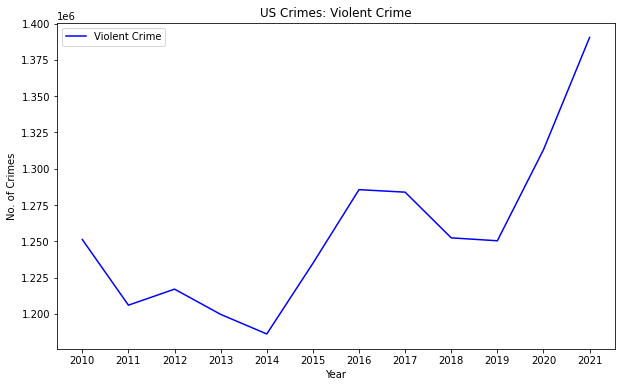

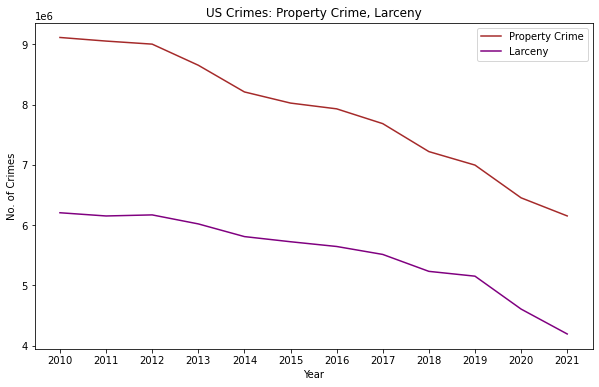

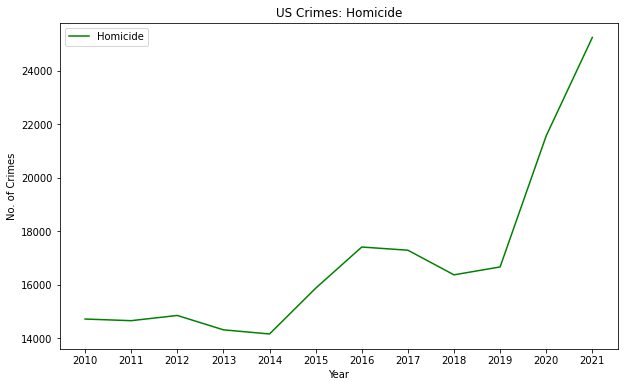

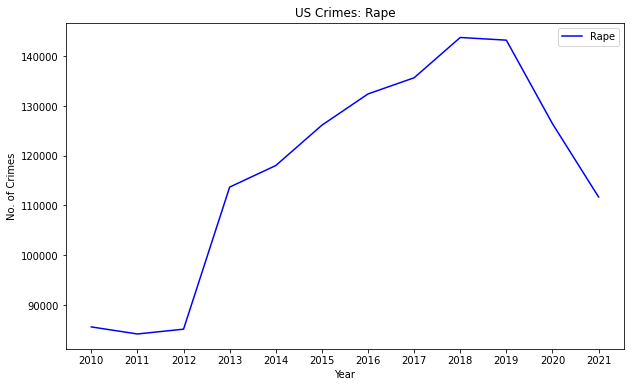

In [102]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Aggravated Assault'].tolist(),color='black', label='Aggravated Assault')
# plt.plot(years,combined['Burglary'].tolist(),color='pink', label='Burglary')
plt.plot(years,combined['Motor Vehicle Theft'].tolist(),color='gray', label='Motor Vehicle Theft')
plt.title('US Crimes: Aggravated Assault, Motor Vehicle Theft')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Robbery'].tolist(),color='blue', label='Robbery')
plt.title('US Crimes: Robbery')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Burglary'].tolist(),color='blue', label='Burglary')
plt.title('US Crimes: Burglary')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Violent Crime'].tolist(),color='blue', label='Violent Crime')
plt.title('US Crimes: Violent Crime')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig2, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Property Crime'].tolist(),color='brown', label='Property Crime')
plt.plot(years,combined['Larceny'].tolist(),color='purple', label='Larceny')
plt.title('US Crimes: Property Crime, Larceny')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig3, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Homicide'].tolist(),color='green', label='Homicide')
# plt.plot(years,combined['Rape'].tolist(),color='orange', label='Rape')
plt.title('US Crimes: Homicide')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(years,combined['Rape'].tolist(),color='blue', label='Rape')
plt.title('US Crimes: Rape')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

Text(0, 0.5, 'No. of Crimes')

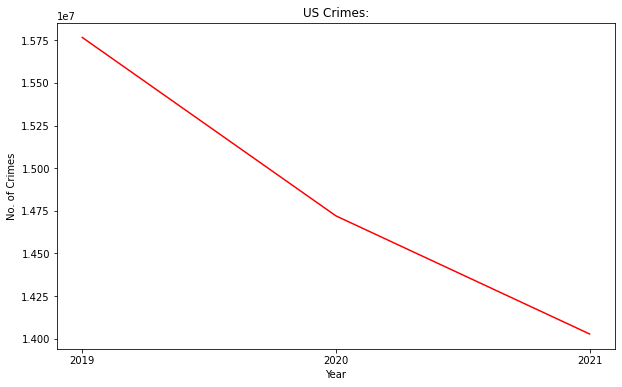

In [103]:
year_list = ['2019','2020','2021']

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['All'].loc[9:11],color='red', label='All')
plt.title('US Crimes:')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')

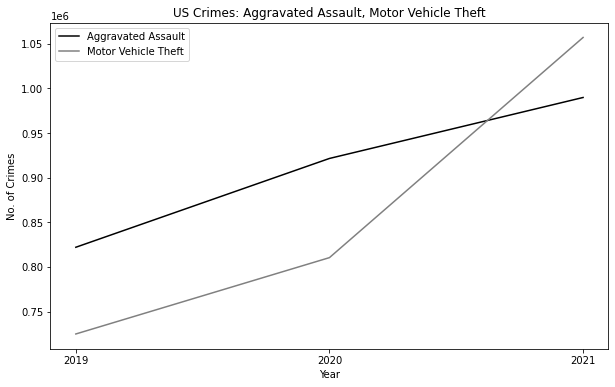

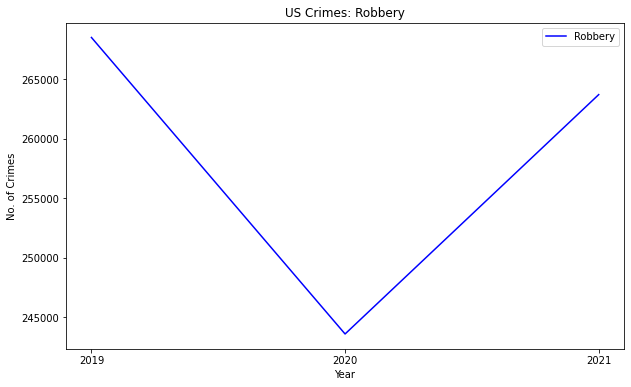

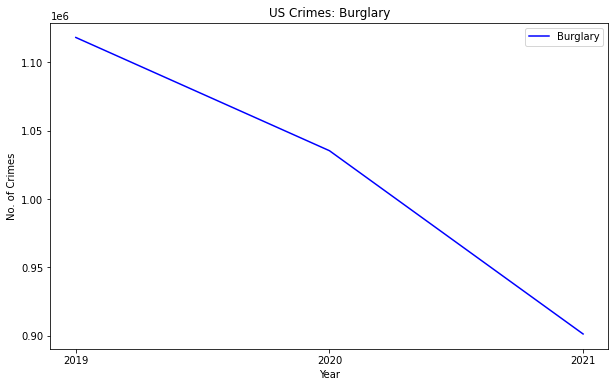

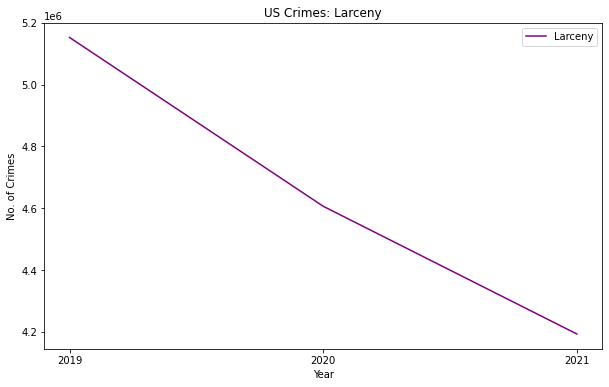

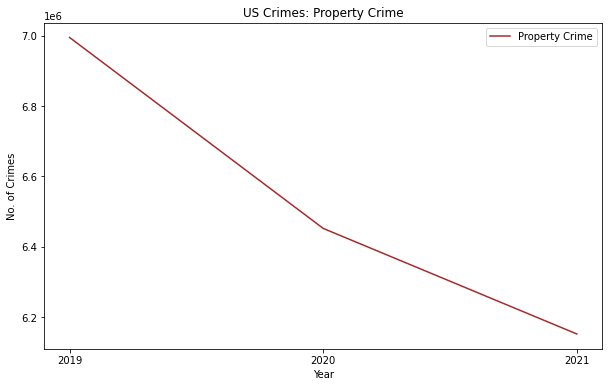

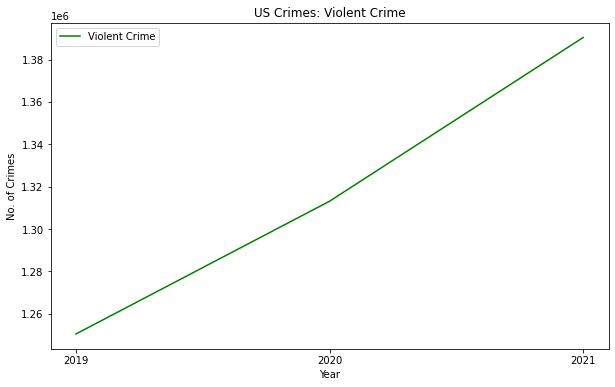

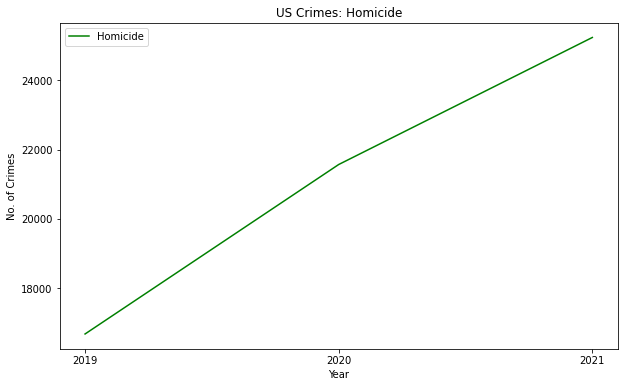

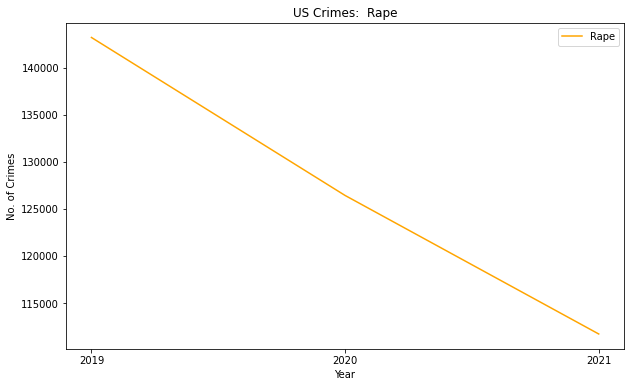

In [104]:
fig1, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Aggravated Assault'].loc[9:11],color='black', label='Aggravated Assault')
plt.plot(year_list, combined['Motor Vehicle Theft'].loc[9:11],color='gray', label='Motor Vehicle Theft')
plt.title('US Crimes: Aggravated Assault, Motor Vehicle Theft')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig1, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Robbery'].loc[9:11],color='blue', label='Robbery')
plt.title('US Crimes: Robbery')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig1, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Burglary'].loc[9:11],color='blue', label='Burglary')
plt.title('US Crimes: Burglary')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig2, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Larceny'].loc[9:11],color='purple', label='Larceny')
plt.title('US Crimes: Larceny')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig2, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Property Crime'].loc[9:11],color='brown', label='Property Crime')
plt.title('US Crimes: Property Crime')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig3, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Violent Crime'].loc[9:11],color='green', label='Violent Crime')
plt.title('US Crimes: Violent Crime')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig3, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Homicide'].loc[9:11],color='green', label='Homicide')
plt.title('US Crimes: Homicide')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

fig3, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, combined['Rape'].loc[9:11],color='orange', label='Rape')
plt.title('US Crimes:  Rape')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.legend()

In [111]:
combined_ny = combined_old[combined_old['State'].isin(["Washington"])]
combined_ny
# fig3, ax = plt.subplots(figsize=(10,6))
# plt.plot(years, combined_ny['All'].tolist(), label='NY')
# plt.title('New York Crimes: ALL Crimes')
# plt.xlabel('Year')
# plt.ylabel('No. of Crimes')
# plt.legend()

,Year,State,Population,Violent Crime,Homicide,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape,All
1660,2010,Washington,6742950,21138,154,5929,12476,249426,55192,168490,25744,"2,579","515,384"
1712,2011,Washington,6823267,20152,163,5627,12042,244209,56561,162828,24820,"2,320","503,902"
1764,2012,Washington,6895318,20553,217,5801,12285,254377,61376,166338,26663,"2,250","523,197"
1816,2013,Washington,6973742,20223,167,5829,11623,259139,58487,172227,28425,"2,604","530,299"
1868,2014,Washington,7063166,20185,178,5641,11586,261257,55381,175317,30559,"2,780","532,325"
1920,2015,Washington,7160290,20505,218,5450,12059,249474,51114,171393,26967,"2,778","512,991"
1972,2016,Washington,7280934,22101,195,5649,13124,254994,49249,173423,32322,"3,133","521,868"
2023,2017,Washington,7425432,22483,226,5386,13571,235206,43687,162154,29365,"3,300","486,013"
2075,2018,Washington,7523869,23719,236,5557,14316,223256,40434,154941,27881,"3,610","466,069"
36,2021,Washington,1612034,43740,408,11436,28884,323872,64504,208940,50428,"3,012","684,796"


In [ ]:
df_cases = pd.read_csv('us.csv')
for index, row in df_cases.iterrows():
    if index==0:
        df_cases.loc[index,"new_cases"]=1.0
        continue 
    df_cases.loc[index,"new_cases"]=df_cases.loc[index,"cases"]-df_cases.loc[index-1,"cases"]

df_cases['year'] =  pd.DatetimeIndex(df_cases['date']).year
df_cases




,date,cases,deaths,new_cases,year
0,2020-01-21,1,0,1,2020
1,2020-01-22,1,0,0,2020
2,2020-01-23,1,0,0,2020
3,2020-01-24,2,0,1,2020
4,2020-01-25,3,0,1,2020
...,...,...,...,...,...
828,2022-04-28,81156232,991502,"73,569",2022
829,2022-04-29,81237905,991921,"81,673",2022
830,2022-04-30,81260672,992010,"22,767",2022
831,2022-05-01,81276040,992033,"15,368",2022


In [ ]:
sum_newcasesbyyear = []
for i in year_list:
    sum = 0
    # print(i + " " + df_cases['year'])
    for row in df_cases.itertuples():
        # print(row.new_cases)
        if str(row.year) == i:
            # print("here")
            sum += row.new_cases
    sum_newcasesbyyear.append(sum)

print(sum_newcasesbyyear)




[0, 20024801.0, 34664566.0]


In [ ]:
crime_df_yearwise_grouped = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())
# crime_df_yearwise_grouped = crime_df_yearwise_grouped[crime_df_yearwise_grouped['Year'].isin(year_list) ]
crime_df_yearwise_grouped = crime_df_yearwise_grouped.tail(3)
crime_df_yearwise_grouped


/var/folders/qs/1lf83t810fd_mwlrhrsvknvc0000gn/T/ipykernel_10592/992321373.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_df_yearwise_grouped = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())


,Year,Population,Violent Crime,Homicide,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,All
9,2019,328329953,1250393,16669,143224,268483,822017,6995235,1118096,5152267,724872,15766384
10,2020,329484123,1313105,21570,126430,243600,921505,6452038,1035314,4606324,810400,14719886
11,2021,50624321,1390440,25244,111704,263688,989804,6151668,901344,4193284,1057040,14027176


In [ ]:
# df2022 = {'Year': '2022', 'Population': 50624321, 'Violent Crime': 0, 'Homicide': 0, 'Rape': 0, 'Robbery': 0, 'Aggravated Assault': 0, 'Property Crime': 0, 'Burglary': 0, 'Larceny': 0, 'Motor Vehicle Theft':0, 'All': 0}
# crime_df_yearwise_grouped = crime_df_yearwise_grouped.append(df2022, ignore_index = True)
# crime_df_yearwise_grouped

Text(0.5, 0, 'Year')

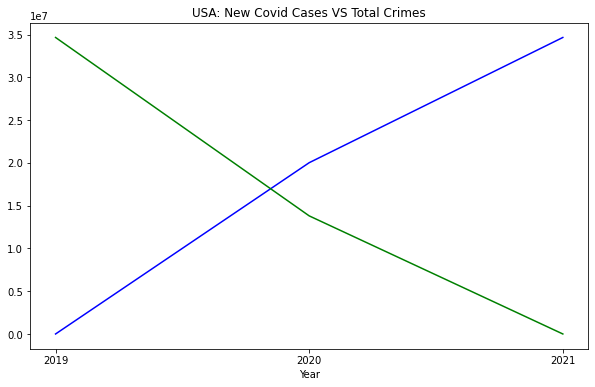

In [ ]:
All_crimes = crime_df_yearwise_grouped['All']
All_crimes = list(All_crimes)
xmin = min(All_crimes) 
xmax = max(All_crimes)
for i, x in enumerate(All_crimes):
    All_crimes[i] = (x-xmin) / (xmax-xmin)
    All_crimes[i] *= 34664566
# plt.plot(All_crimes, sum_newcasesbyyear)


fig3, ax = plt.subplots(figsize=(10,6))
plt.plot(year_list, sum_newcasesbyyear, color='blue')
plt.plot(year_list, All_crimes, color='green')
# plt.plot(year_list, combined['All'].loc[9:11],color='red', label='All')
# plt.plot(combined_ny['Year'], combined_ny['Aggravated Assault'])
# plt.plot(combined_ny['Year'],combined_ny['Burglary'])
# plt.plot(combined_ny['Year'],combined_ny['Motor Vehicle Theft'])
plt.title('USA: New Covid Cases VS Total Crimes')
plt.xlabel('Year')


In [119]:
crime_df_yearwise_grouped = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())
# row_2020 = crime_df_yearwise_grouped[crime_df_yearwise_grouped['Year'] == 2020]
# row_2018 = crime_df_yearwise_grouped[crime_df_yearwise_grouped['Year'] == 2018]
# row_2019 = crime_df_yearwise_grouped[crime_df_yearwise_grouped['Year'] == 2019]
# row_2017 = crime_df_yearwise_grouped[crime_df_yearwise_grouped['Year'] == 2017]
decrease_rate_19_20 = ((crime_df_yearwise_grouped.loc[9]['All'] - crime_df_yearwise_grouped.loc[10]['All'])/crime_df_yearwise_grouped.loc[9]['All']) * 100
decrease_rate_18_19 = ((crime_df_yearwise_grouped.loc[8]['All'] - crime_df_yearwise_grouped.loc[9]['All'])/crime_df_yearwise_grouped.loc[8]['All']) * 100
decrease_rate_17_18 = ((crime_df_yearwise_grouped.loc[7]['All'] - crime_df_yearwise_grouped.loc[8]['All'])/crime_df_yearwise_grouped.loc[7]['All']) * 100
decrease_rate_16_17 = ((crime_df_yearwise_grouped.loc[6]['All'] - crime_df_yearwise_grouped.loc[7]['All'])/crime_df_yearwise_grouped.loc[6]['All']) * 100
decrease_rate_15_16 = ((crime_df_yearwise_grouped.loc[5]['All'] - crime_df_yearwise_grouped.loc[6]['All'])/crime_df_yearwise_grouped.loc[5]['All']) * 100
decrease_rate_14_15 = ((crime_df_yearwise_grouped.loc[4]['All'] - crime_df_yearwise_grouped.loc[5]['All'])/crime_df_yearwise_grouped.loc[4]['All']) * 100
decrease_rate_13_14 = ((crime_df_yearwise_grouped.loc[3]['All'] - crime_df_yearwise_grouped.loc[4]['All'])/crime_df_yearwise_grouped.loc[3]['All']) * 100
decrease_rate_12_13 = ((crime_df_yearwise_grouped.loc[2]['All'] - crime_df_yearwise_grouped.loc[3]['All'])/crime_df_yearwise_grouped.loc[2]['All']) * 100
decrease_rate_11_12 = ((crime_df_yearwise_grouped.loc[1]['All'] - crime_df_yearwise_grouped.loc[2]['All'])/crime_df_yearwise_grouped.loc[1]['All']) * 100
decrease_rate_10_11 = ((crime_df_yearwise_grouped.loc[0]['All'] - crime_df_yearwise_grouped.loc[1]['All'])/crime_df_yearwise_grouped.loc[0]['All']) * 100
print("Decrease from 2019 to 2020: " + str(decrease_rate_19_20) + "%" )
print("Decrease from 2018 to 2019: " + str(decrease_rate_18_19) + "%" )
print("Decrease from 2017 to 2018: " + str(decrease_rate_17_18) + "%" )
print("Decrease from 2016 to 2017: " + str(decrease_rate_16_17) + "%" )
print("Decrease from 2015 to 2016: " + str(decrease_rate_15_16) + "%" )
print("Decrease from 2014 to 2015: " + str(decrease_rate_14_15) + "%" )
print("Decrease from 2013 to 2014: " + str(decrease_rate_13_14) + "%" )
print("Decrease from 2012 to 2013: " + str(decrease_rate_12_13) + "%" )
print("Decrease from 2011 to 2012: " + str(decrease_rate_11_12) + "%" )
print("Decrease from 2010 to 2011: " + str(decrease_rate_10_11) + "%" )


Decrease from 2019 to 2020: 6.63752703219711%
Decrease from 2018 to 2019: 2.6229162731882565%
Decrease from 2017 to 2018: 5.650796936247024%
Decrease from 2016 to 2017: 2.832226429991265%
Decrease from 2015 to 2016: 0.8043722731846216%
Decrease from 2014 to 2015: 1.653777232103229%
Decrease from 2013 to 2014: 4.73332616255989%
Decrease from 2012 to 2013: 3.61075737454097%
Decrease from 2011 to 2012: 0.43491654983778627%
Decrease from 2010 to 2011: 0.9362582818316484%


/var/folders/qs/1lf83t810fd_mwlrhrsvknvc0000gn/T/ipykernel_10592/77062374.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime_df_yearwise_grouped = combined.groupby(["Year"],as_index=False)['Population', 'Violent Crime', 'Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'All'].apply(lambda x : x.astype(int).sum())
